DETEKSI TEPI Roberts

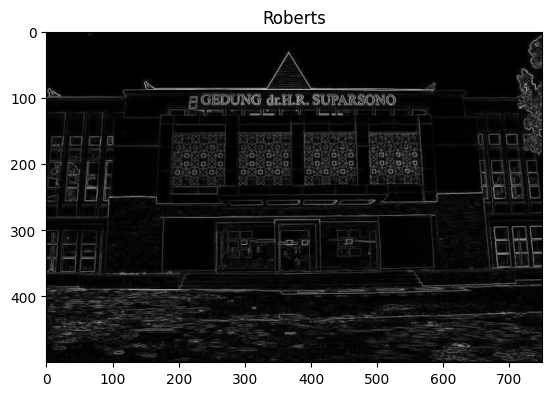

In [7]:
import cv2 
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread("tidar.jpg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.figure()
plt.title('Roberts')
plt.imsave('Roberts.png', edged_img, cmap='gray', format='png')
plt.imshow(edged_img, cmap='gray')
plt.show()

Deteksi Tepi Laplican

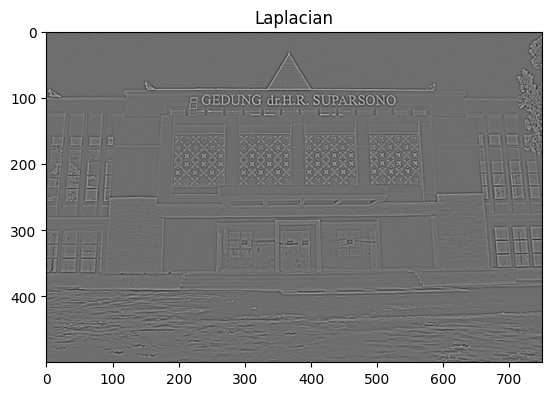

In [6]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('tidar.jpg')

# Apply gray scale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply gaussian blur
blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Positive Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

plt.figure()
plt.title('Laplacian')
plt.imsave('Laplacian.png', laplacian, cmap='gray', format='png')
plt.imshow(laplacian, cmap='gray')
plt.show()

CANNY😂

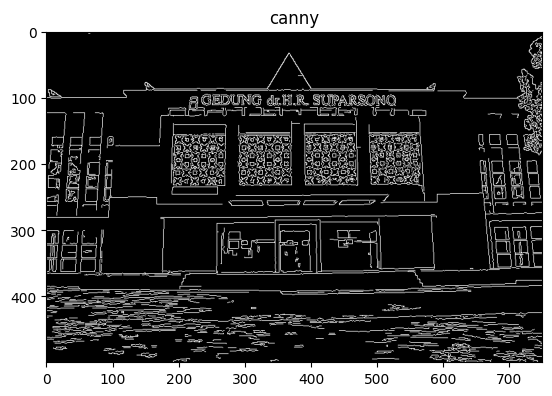

In [8]:
import cv2
import matplotlib.pyplot as plt

# Open the image
img = cv2.imread('tidar.jpg')

# Apply Canny
edges = cv2.Canny(img, 100, 200, 3, L2gradient=True)

plt.figure()
plt.title('canny')
plt.imsave('canny.png', edges, cmap='gray', format='png')
plt.imshow(edges, cmap='gray')
plt.show()

SOBEL

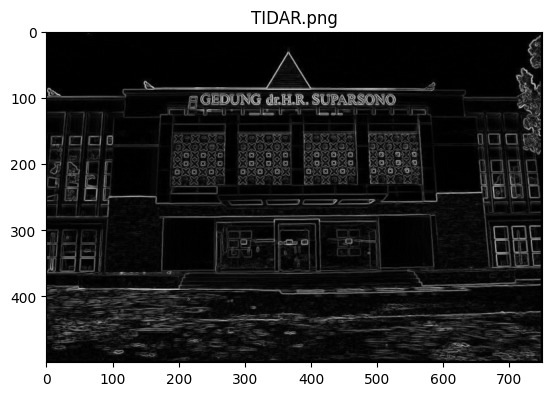

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Open the image
img = np.array(Image.open('tidar.jpg')).astype(np.uint8)
#plt.imshow(img)
# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.title('TIDAR.png')
plt.imsave('tidar.jpg', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

PREWITT

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Open the image
img = np.array(Image.open('img/monarch1.jpg')).astype(np.uint8)
#plt.imshow(img)
# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)

# Sobel Operator
h, w = gray_img.shape

# define filters
horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1

# define images with 0s
newhorizontalImage = np.zeros((h, w))
newverticalImage = np.zeros((h, w))
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        newhorizontalImage[i - 1, j - 1] = abs(horizontalGrad)

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        newverticalImage[i - 1, j - 1] = abs(verticalGrad)

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag

plt.figure()
plt.title('demo-sobel.png')
plt.imsave('edge/monarch1_sobel.png', newgradientImage, cmap='gray', format='png')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

Source :
https://github.com/snijesh/edge-detection